In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('./lady_mail_horoscope/df_three.csv', sep=";")

In [22]:
df.loc[df['Рыбы'].str.contains('Подпиш')]['Рыбы'][-1:].values

array([' Принимать какие-то важные решения можно лишь в том случае, если вы совершенно уверены в том, что делаете это хладнокровно и самостоятельно, а не поддаетесь давлению и не идете на поводу у мимолетных переживаний. К любым делам нужно подходить серьезно и спокойно, только так можно избежать ошибок. Если же эмоции захлестывают и взять себя в руки не удается, лучше просто отдохнуть, ничего не предпринимая. Окружающие не всегда относятся к вам с пониманием, часто критикуют, делают какие-то неприятные замечания. Но в ваших силах избежать открытого конфликта. Для этого достаточно вовремя продемонстрировать дружелюбный настрой. Подпишитесь на нашу рассылку, чтобы получать прогнозы по почте Подписаться Подпишитесь на нашу рассылку, чтобы получать прогнозы по почте Подписаться Подпишитесь на нашу рассылку, чтобы получать прогнозы по почте Подписаться Подпишитесь на нашу рассылку, чтобы получать прогнозы по почте Подписаться Подписаться'],
      dtype=object)

In [23]:
df_clean = df.copy()
df_clean['Рыбы'] = df_clean['Рыбы'].replace('. Подпиш.*', '.', regex=True)

In [24]:
df_clean['Рыбы'][-1:].values

array([' Принимать какие-то важные решения можно лишь в том случае, если вы совершенно уверены в том, что делаете это хладнокровно и самостоятельно, а не поддаетесь давлению и не идете на поводу у мимолетных переживаний. К любым делам нужно подходить серьезно и спокойно, только так можно избежать ошибок. Если же эмоции захлестывают и взять себя в руки не удается, лучше просто отдохнуть, ничего не предпринимая. Окружающие не всегда относятся к вам с пониманием, часто критикуют, делают какие-то неприятные замечания. Но в ваших силах избежать открытого конфликта. Для этого достаточно вовремя продемонстрировать дружелюбный настрой.'],
      dtype=object)

In [39]:
df_clean.to_csv('./lady_mail_horoscope/df_three_clean.csv', index=False, sep=";")

In [42]:
import matplotlib.pyplot as plt
# import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
# from nltk.corpus import stopwords
from collections import Counter

In [44]:
info = pd.DataFrame()
for col in ['Овен', 'Телец',
       'Близнецы', 'Рак', 'Лев', 'Дева', 'Весы', 'Скорпион', 'Стрелец',
       'Козерог', 'Водолей', 'Рыбы']:
    info[col + '_len'] = df_clean[col].apply(lambda x: len(str(x).split(' ')))
    
info.mean()

Овен_len        77.646302
Телец_len       77.536977
Близнецы_len    76.080386
Рак_len         76.533762
Лев_len         76.080386
Дева_len        76.627010
Весы_len        76.620579
Скорпион_len    77.212219
Стрелец_len     76.446945
Козерог_len     76.340836
Водолей_len     76.971061
Рыбы_len        76.662379
dtype: float64

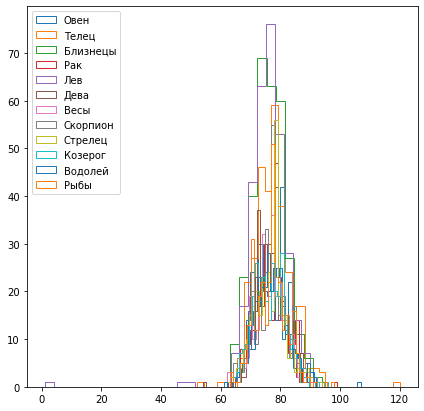

In [45]:
plt.figure(figsize=(7,7))
for col in ['Овен', 'Телец',
       'Близнецы', 'Рак', 'Лев', 'Дева', 'Весы', 'Скорпион', 'Стрелец',
       'Козерог', 'Водолей', 'Рыбы']:
    
    plt.hist(info[col+'_len'],bins = 30,histtype='step',label= col )#.hist(bins = 30,l)
plt.legend()

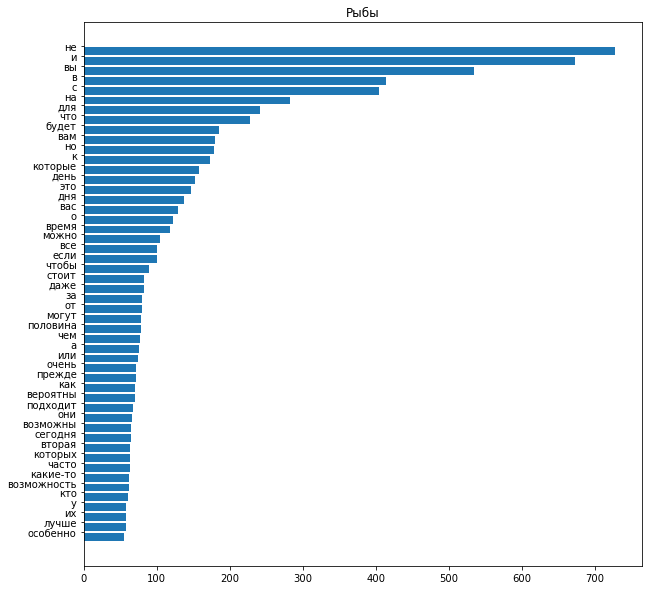

In [49]:
for col in ['Рыбы']:
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df_clean[col] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words]
    plt.figure(figsize=(10,10))
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(col)
    plt.show()
